<a href="https://colab.research.google.com/github/Janeth172/EDP1/blob/main/CAMACHO_SALVADOR_METODOGALERKIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÉTODO DE GALERKIN**

Una solución aproximada del problema $
- u'' + u - x = 0
$
con condiciones de frontera
$
u(0) = u(1) = 0
$
debe encontrarse utilizando el método de Galerkin. Use
$$
u_3(x) = \sum_{i=1}^{3} \alpha_i \phi_i(x)
$$
con
$
\phi_i(x) = \sin(i \pi x)
$
para encontrar las constantes apropiadas \(\alpha_i\).



**Solución exacta**

En primer lugar, se determina la solución analítica del problema, la cual servirá como referencia para contrastarla posteriormente con la solución aproximada.

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# SE DEFINEN LOS SIMBOLOS
x = sp.symbols('x')
u = sp.Function('u')

ode = -sp.diff(u(x), x, 2) + u(x) - x    # SOLUCIÓN DE LA EDO
sol = sp.dsolve(ode, u(x), ics={u(0): 0, u(1): 0})    # CONDICIONES DE FRONTERA
u_exact = sp.simplify(sol.rhs)            # SIMPLICACIÓN
u_exact # SOLUCION EXACTA

(x*(1 - exp(2))*exp(x) + exp(2*x + 1) - E)*exp(-x)/(1 - exp(2))

**Aproximación mediante el método de Galerkin**

Se plantea una solución aproximada expresada como una suma lineal de un número finito de funciones base. En este caso, se eligen tres funciones tipo seno, las cuales satisfacen las condiciones de frontera del problema.

In [10]:
# SE DEFINEN SIMBOLOS
a1, a2, a3 = sp.symbols('a1 a2 a3')

# SE DEFINE LAS TRES FUNCIONES
beta1 = sp.sin(sp.pi*x)
beta2 = sp.sin(2*sp.pi*x)
beta3 = sp.sin(3*sp.pi*x)

# SE ESCRIBEN COMO FUNCION LINEAL
u3 = a1*beta1 + a2*beta2 + a3*beta3
u3

a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x)

A continuación, se construye el residuo asociado a la solución aproximada y se aplican las condiciones necesarias del método de Galerkin.

In [11]:
# RESIDUO DEL METODO
R = -sp.diff(u3, x, 2) + u3 - x

# INTEGRAL DE CADA UNO
eq1 = sp.integrate(R*beta1, (x, 0, 1))
eq2 = sp.integrate(R*beta2, (x, 0, 1))
eq3 = sp.integrate(R*beta3, (x, 0, 1))

sol_alpha = sp.solve([eq1, eq2, eq3], [a1, a2, a3])
sol_alpha

{a1: 2/(pi + pi**3), a2: -1/(pi + 4*pi**3), a3: 2/(3*pi + 27*pi**3)}

Se incorporan los coeficientes calculados dentro de la expresión de la solución aproximada.

In [12]:
# SE SUSTIYUYE
u_galerkin = u3.subs(sol_alpha)
sp.simplify(u_galerkin)

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

**Comparación gráfica**

Se realiza una comparación visual entre la solución exacta del problema y la solución obtenida mediante la aproximación.

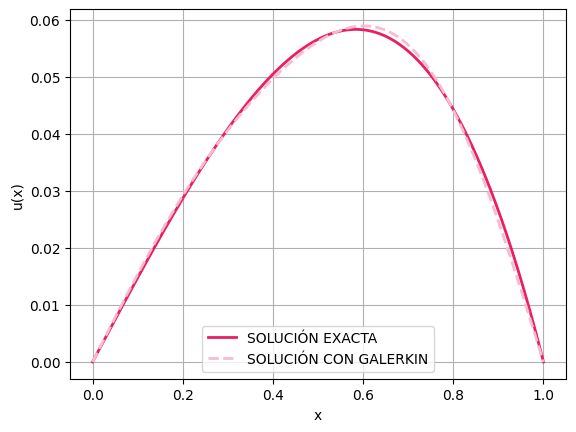

In [13]:
# COMPARACIÓN DE AMBAS SOLUCIONES

u_exact_f = sp.lambdify(x, u_exact, 'numpy')
u_gal_f = sp.lambdify(x, u_galerkin, 'numpy')

xx = np.linspace(0, 1, 400)

plt.figure()
plt.plot(xx, u_exact_f(xx), color='#e91e63', linewidth=2, label='SOLUCIÓN EXACTA')   # rosa fuerte
plt.plot(xx, u_gal_f(xx), '--', color='#f8bbd0', linewidth=2, label='SOLUCIÓN CON GALERKIN')  # rosa claro
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid()
plt.show()

**Error de la aproximación**

Se evalúa la precisión de la solución aproximada mediante el cálculo del error máximo, correspondiente a la norma infinita, así como del error medido en la norma $
L²$

In [14]:
# EL ERROR e(x)
error = np.abs(u_exact_f(xx) - u_gal_f(xx))

# NORMA INFINITA
error_inf = np.max(error)

# NORMA L2
# UN PONDERADO DE LOS ERRORES
error_L2 = np.sqrt(np.trapezoid(error**2, xx))

print("Error máximo:", error_inf)
print("Error con norma 2:", error_L2)

Error máximo: 0.00198231366907033
Error con norma 2: 0.0008441839170882415
